In [3]:
from IPython.display import Image
import tensorflow.keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import glob
from tqdm.notebook import tqdm

### **Keras Applications**

Ver más: https://keras.io/api/applications/

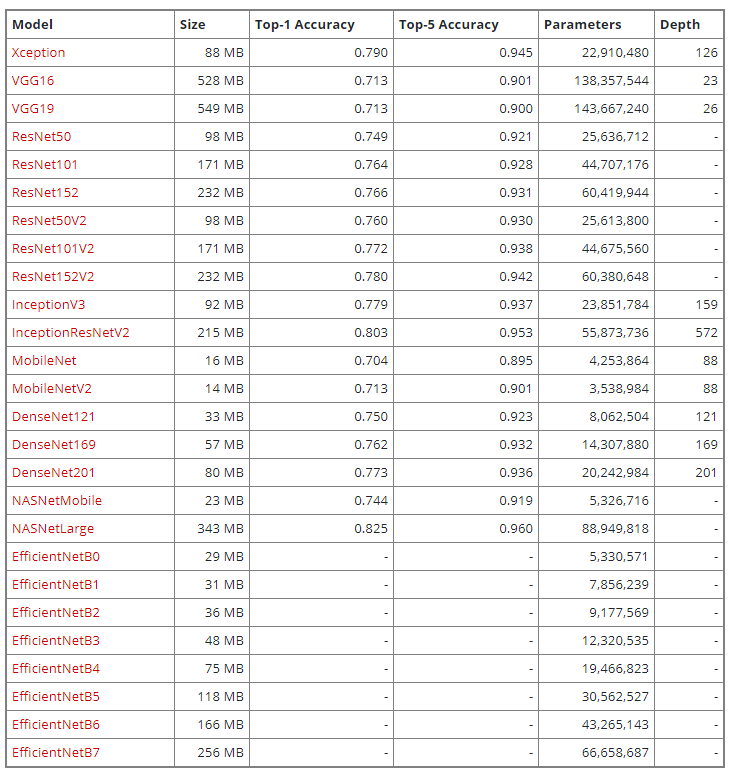

In [4]:
#@title Cargar `ResNet50` pre-entrenado con  **`include_top=False`** 🤖 { run: "auto" }
model_name = "ResNet50" #@param ["ResNet50"]
if model_name == "ResNet50":
  from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
  model = ResNet50(weights='imagenet', include_top=True)
  target_size=(224, 224)
print("Modelo cargado: {}".format(model.name))

Modelo cargado: resnet50


### **Mostrar Modelo**

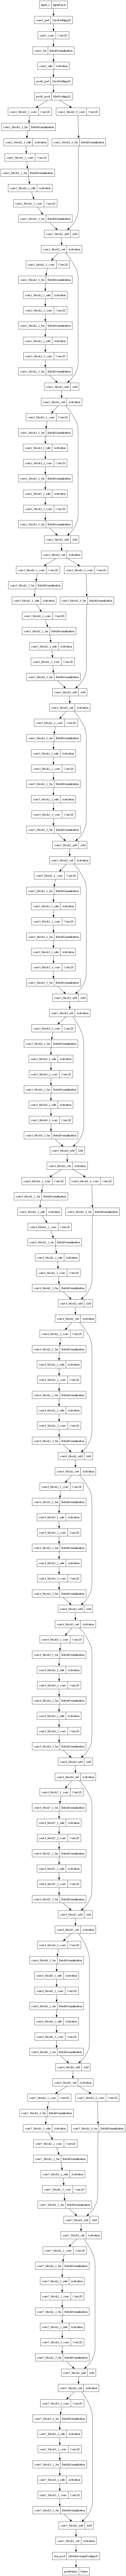

In [5]:
plot_model(model)

In [6]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### **Cargar imagen de prueba 🐘🖼️**

In [21]:
# Obtener la lista de nombres de archivos
filenames = glob.glob('Logo-2K+/*/*/1.jpg')
filenames

['Logo-2K+\\Accessories\\24seven\\1.jpg',
 'Logo-2K+\\Accessories\\Ace\\1.jpg',
 'Logo-2K+\\Accessories\\aceh\\1.jpg',
 'Logo-2K+\\Accessories\\Admiral\\1.jpg',
 'Logo-2K+\\Accessories\\Aetrex\\1.jpg',
 'Logo-2K+\\Accessories\\Agio\\1.jpg',
 'Logo-2K+\\Accessories\\Aim\\1.jpg',
 'Logo-2K+\\Accessories\\Akubra\\1.jpg',
 'Logo-2K+\\Accessories\\ALAN\\1.jpg',
 'Logo-2K+\\Accessories\\Alexia\\1.jpg',
 'Logo-2K+\\Accessories\\Allstar\\1.jpg',
 'Logo-2K+\\Accessories\\ara\\1.jpg',
 'Logo-2K+\\Accessories\\Artemide\\1.jpg',
 'Logo-2K+\\Accessories\\Ashbury\\1.jpg',
 'Logo-2K+\\Accessories\\Atlantic\\1.jpg',
 'Logo-2K+\\Accessories\\Atlantic Airlines\\1.jpg',
 'Logo-2K+\\Accessories\\Audar\\1.jpg',
 'Logo-2K+\\Accessories\\Aurora\\1.jpg',
 'Logo-2K+\\Accessories\\Avanti\\1.jpg',
 'Logo-2K+\\Accessories\\Baba\\1.jpg',
 'Logo-2K+\\Accessories\\BACCARAT\\1.jpg',
 'Logo-2K+\\Accessories\\BAE\\1.jpg',
 'Logo-2K+\\Accessories\\Baker Skateboards\\1.jpg',
 'Logo-2K+\\Accessories\\Balance\\1.jpg',
 'Lo

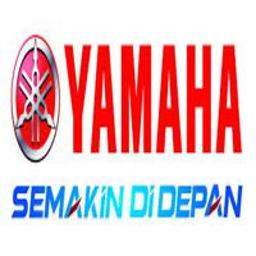

In [22]:
#@title Visualizar Dataset { run: "auto" }
idx = 2340 #@param {type:"slider", min:0, max:2340, step:1}
display(Image(filenames[idx]))

In [23]:
features = []
for filename in tqdm(filenames):
  img = image.load_img(filename, target_size=target_size)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features.append(model.predict(x).ravel())
features = np.array(features)
features.shape

  0%|          | 0/2341 [00:00<?, ?it/s]

1/1 [==============================] - 1s 502ms/step


(2341, 1000)

# **Ejercicio (20 puntos)**

Muestre los k logotipos más próximos (usando las características de un `ResNet50`).

Nota: Puede usar distancia euclidiana, coseno u otras.

Imagen de Query


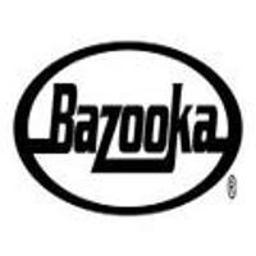

Imágenes Recuperadas (Total Imágenes: 6 imágenes)


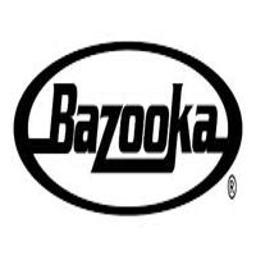

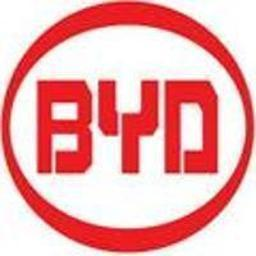

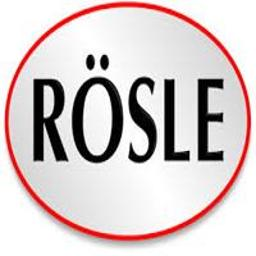

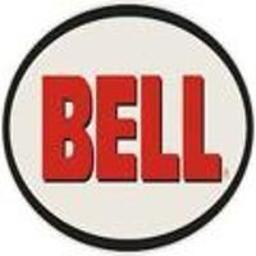

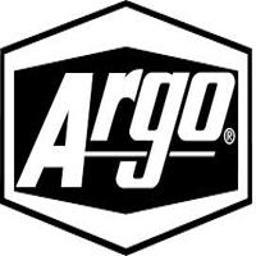

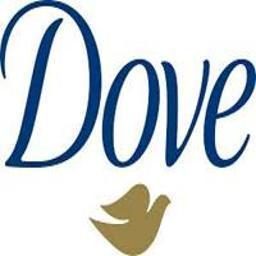

In [27]:
#@title Mostrar los K logos más similares { run: "auto" }
idx = 863 #@param {type:"slider", min:0, max:2340, step:1}
k = 6 #@param {type:"slider", min:1, max:30, step:1}
print("Imagen de Query")
display(Image(filenames[idx]))
########################################
####   Desarrolle su código aquí   #####
########################################
print("Imágenes Recuperadas (Total Imágenes: {} imágenes)".format(k))
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors = k+1, algorithm = 'auto', metric = 'euclidean').fit(features)
distances, indices = neighbors.kneighbors([features[idx]])
for i in range(1, len(indices[0])):
  display(Image(filenames[indices[0][i]]))
#########################################